# CLIMATE DATA DE BILT UNCLEANED VERSION

Bu notebook, Hollanda'daki iklim normallerinin 1800-2014 yılları arasındaki değişimlerinin analizinde kullanılan **veri işleme** ve **Python uygulamaları** üzerine bir çalışma içermektedir.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Excel dosyasını içe aktarma
file_path = "veri.xlsx"
df = pd.read_excel(file_path)

In [8]:
#Ilk 5 satırı görmek istiyorum

print(df.head())

   ID   Periods  YearAverage_1  WinterAverage_2  SummerAverage_3  \
0   0  1971X000            9.8              3.3             16.6   
1   1  1981X000           10.1              3.4             17.0   
2   2  1800JJ00            NaN             -1.0             15.1   
3   3  1801JJ00            NaN              1.7             15.2   
4   4  1802JJ00            NaN              1.1             15.3   

   WinterAverageMinimumTemperature_4  SummerAverageMaximumTemperature_5  \
0                                0.4                               21.4   
1                                0.5                               21.9   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   IceDays_6  FrostDays_7  SummeryDays_8  ...  HeatingDegreeDays_10  \
0        8.0         58.0           22.0  ...                3075.0  

In [10]:
#Data setimin içindeki veri tiplerini görmek istiyorum

df.dtypes

ID                                     int64
Periods                               object
YearAverage_1                        float64
WinterAverage_2                      float64
SummerAverage_3                      float64
WinterAverageMinimumTemperature_4    float64
SummerAverageMaximumTemperature_5    float64
IceDays_6                            float64
FrostDays_7                          float64
SummeryDays_8                        float64
TropicalDays_9                       float64
HeatingDegreeDays_10                 float64
QuantityOfPrecipitation_11           float64
DaysWithPrecipitation_12             float64
SnowDays_13                          float64
DryDays_14                           float64
DaysWithFog_15                       float64
Evaporation_16                       float64
RelativeHumidity_17                  float64
HoursOfSunshine_18                   float64
SunlessDays_19                       float64
dtype: object

In [12]:
#Veri setimin boyutunu (satır, sütun) olarak kontrol ediyorum.

print(df.shape)

(217, 21)


In [14]:
#NaN şeklinde gösterilen kısımlar eksik veri. Veri setimde her sütunda toplam kaç eksik veri olduğunu kontrol ediyorum.

print(df.isnull().sum())

ID                                     0
Periods                                0
YearAverage_1                        100
WinterAverage_2                        0
SummerAverage_3                        0
WinterAverageMinimumTemperature_4    180
SummerAverageMaximumTemperature_5    180
IceDays_6                            151
FrostDays_7                          151
SummeryDays_8                        151
TropicalDays_9                       180
HeatingDegreeDays_10                 140
QuantityOfPrecipitation_11           106
DaysWithPrecipitation_12             171
SnowDays_13                          180
DryDays_14                           181
DaysWithFog_15                       180
Evaporation_16                       180
RelativeHumidity_17                  180
HoursOfSunshine_18                   100
SunlessDays_19                       171
dtype: int64


### YORUMLAR

#### 1. [13] numaralı hücrede gördüğümüz üzere ve veri setini aldığımız sitedeki açıklamaya göre şu sonuca varmaktayız:

a) Winter Average Temperature ve Summer Average Temperature verileri 1800 yılından başlamakta. Tüm sütunlar dolu.

b) Yearly Average Temperature ve Hours of Sunshine verileri 1900 yılından itibaren başlamakta.

c) Gün bazında veriler genellikle 1940 ve 1950 yılından itibaren başlamakta.

d) Tamamlanmış veriler 1980 ve sonrasına ait.

#### 2. Data setindeki veriler: 4 ana başlığa dağılıyor: 

1- Sıcaklık bazında veriler: Yearly Avg Temp, Winter Avg Temp, Summer Avg Temp, Winter Avg Min Temp ve Summer Avg Max Temp.

2- Gün bazında veriler: Ice Days, Frost Days, Summery Days, Tropical Days, Snow Days, Heating Degree Days, Days with Precipitation, Days with Fog, Dry Days, Sunless Days

3- Saat bazında veriler: Hours of Sunshine

4- Diğer: Quantity of Precipitation (Birimi bilinmiyor/mm,cm,lt per sqm olabilir), Evaporation (Birimi bilinmiyor), Relative Humidity (%)

> Verilerin yıllara göre dağılımını daha iyi anlayabilmek adına filtreleme kullanılabilir. Birinci filtreleme tür bazında, ikinci filtreleme eksik veri sayısı bazında olabilir. Böylelikle değişkenlerin kendi içlerindeki korelasyonunu daha iyi gözlemleyebiliriz. 

#### 3. Periods değişkeninin türü object olarak nitelendirilmiş. Ancak bu değişken aslında yılları belirtiyor.

Periods değişkeninin içeriği, '1971X000' gibi bir formata sahip. Bu değerin yılını almak için düzenleme yapacağım. Bu durumda yıl kısmını almak için metin dilimleme (str slicing) kullanacağım.

#### 4. ID değişkeni veri sırasını belirtiyor.

ID değişkeni sadece verilerin sırasını belirtiyor ve veriye anlamlı bir katkı sağlamıyor. Bu tür gereksiz sütunlar, modelleme ve analiz aşamalarında karmaşıklığı artırabilir ve verinin okunabilirliğini azaltabilir. Bu değişkeni veri setinden kaldıracağım.

> Periods değişkeninin türünü düzeltilecek ve ID değişkenini silinecek

## DATA PREPROCESSING (Part: 1)

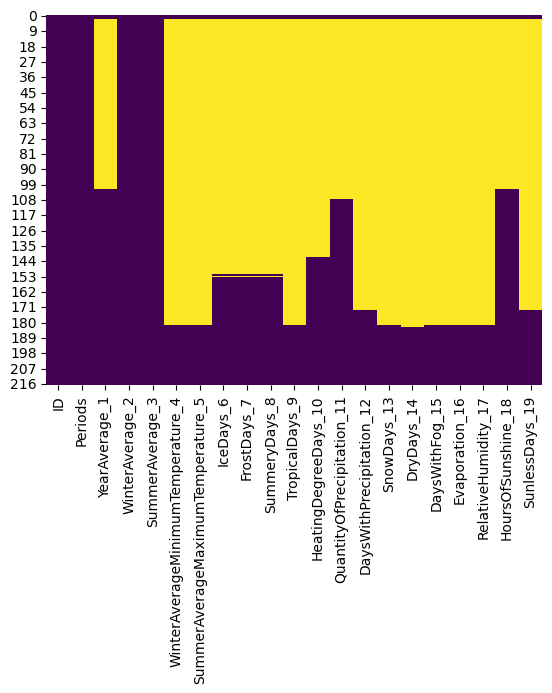

In [18]:
# Eksik verileri görselleştirmek için ısı haritası kullanıyorum.

import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### 1. Adım: ID değişkenini temizleme

In [21]:
# 'ID' sütununu veri setinden kaldırma
df.drop(columns=['ID'], inplace=True)

# Değişiklikleri kontrol ediyorum
print(df.head())

    Periods  YearAverage_1  WinterAverage_2  SummerAverage_3  \
0  1971X000            9.8              3.3             16.6   
1  1981X000           10.1              3.4             17.0   
2  1800JJ00            NaN             -1.0             15.1   
3  1801JJ00            NaN              1.7             15.2   
4  1802JJ00            NaN              1.1             15.3   

   WinterAverageMinimumTemperature_4  SummerAverageMaximumTemperature_5  \
0                                0.4                               21.4   
1                                0.5                               21.9   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   IceDays_6  FrostDays_7  SummeryDays_8  TropicalDays_9  \
0        8.0         58.0           22.0             3.0   
1        8.0         58.0           26.0    

In [23]:
# Veri setimin yeni boyutunu (satır, sütun) olarak kontrol ediyorum.

print(df.shape)

(217, 20)


### 2. Adım: Periods değişkeni - Metin dilimleme (String Slicing)

In [26]:
# Periods değişkeninin ilk 4 karakterini alarak yılı  çıkar. Yeni değişken için "Year" ismini kullan.  

df['Year'] = df['Periods'].str[:4].astype(int)

df.drop('Periods', axis=1, inplace=True)

#Yeni 'Year' değişkenini kontrol et.

print(df['Year'].head())


0    1971
1    1981
2    1800
3    1801
4    1802
Name: Year, dtype: int64


In [28]:
#Data setimin içindeki tüm veri tiplerini tekrar kontrol ediyorum 

df.dtypes

YearAverage_1                        float64
WinterAverage_2                      float64
SummerAverage_3                      float64
WinterAverageMinimumTemperature_4    float64
SummerAverageMaximumTemperature_5    float64
IceDays_6                            float64
FrostDays_7                          float64
SummeryDays_8                        float64
TropicalDays_9                       float64
HeatingDegreeDays_10                 float64
QuantityOfPrecipitation_11           float64
DaysWithPrecipitation_12             float64
SnowDays_13                          float64
DryDays_14                           float64
DaysWithFog_15                       float64
Evaporation_16                       float64
RelativeHumidity_17                  float64
HoursOfSunshine_18                   float64
SunlessDays_19                       float64
Year                                   int64
dtype: object

### 3. Adım: Years (Periods) değişkeninin yerini değiştirme

In [31]:
# Sütunları yeniden sıralama: Year en başa gelecek
df = df[["Year", "YearAverage_1", "WinterAverage_2", "SummerAverage_3", "WinterAverageMinimumTemperature_4", "SummerAverageMaximumTemperature_5","IceDays_6", "FrostDays_7","SummeryDays_8", "TropicalDays_9", "HeatingDegreeDays_10", "QuantityOfPrecipitation_11", "DaysWithPrecipitation_12", "SnowDays_13", "DryDays_14", "DaysWithFog_15", "Evaporation_16", "RelativeHumidity_17", "HoursOfSunshine_18", "SunlessDays_19"]]

# Yeni DataFrame'i görüntüle
print(df)

     Year  YearAverage_1  WinterAverage_2  SummerAverage_3  \
0    1971            9.8              3.3             16.6   
1    1981           10.1              3.4             17.0   
2    1800            NaN             -1.0             15.1   
3    1801            NaN              1.7             15.2   
4    1802            NaN              1.1             15.3   
..    ...            ...              ...              ...   
212  2010            9.1              1.1             17.7   
213  2011           10.9              2.3             16.3   
214  2012           10.3              4.1             16.9   
215  2013            9.8              2.9             17.5   
216  2014           11.7              6.0             17.4   

     WinterAverageMinimumTemperature_4  SummerAverageMaximumTemperature_5  \
0                                  0.4                               21.4   
1                                  0.5                               21.9   
2                       

### 4. Adım: Satır operasyonları

    Ilk iki satırdaki değerler 1971 ve 1981 yıllarına aitken 3. satırdan itibaren 1800'lü yıllara ait veriler girilmiş. 
    Bu iki yıla ait iki kere veri girilmiş. Bu sebeple ilk iki satırı sileceğim.

In [35]:
# Drop komutu ile ilk iki satırın silinmesi
df = df.drop([0, 1])

# DataFrame'in indekslerini sıfırlama (opsiyonel)
df = df.reset_index(drop=True)

print(df)

     Year  YearAverage_1  WinterAverage_2  SummerAverage_3  \
0    1800            NaN             -1.0             15.1   
1    1801            NaN              1.7             15.2   
2    1802            NaN              1.1             15.3   
3    1803            NaN             -1.2             16.0   
4    1804            NaN              2.2             15.4   
..    ...            ...              ...              ...   
210  2010            9.1              1.1             17.7   
211  2011           10.9              2.3             16.3   
212  2012           10.3              4.1             16.9   
213  2013            9.8              2.9             17.5   
214  2014           11.7              6.0             17.4   

     WinterAverageMinimumTemperature_4  SummerAverageMaximumTemperature_5  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                       

### 5. Adım: Veri setinin sonraki Data Preprocessing alt adımlarından önce bu şekliyle kaydedilmesi.

    Bu orijinal sete daha sonra geri dönmemiz gerektiği için veri setini kaydedeceğim.

In [39]:

# Yeni dosyaya kaydetmek (Excel formatında)
df.to_excel('temizlenmis_veri.xlsx', index=False)  # index=False, indeks sütununu dahil etmemek için


## Data Preprocessing (Part 2):
### 1. Adım: Sıcaklık ile alakalı verilerin yıllara göre değişimini anlamak için diğer değişkenlerin silinmesi.

In [42]:
# '6,7,8,9,10,11,12,13,14,15,16,17,18 ve 19.' sütunları veri setinden kaldırma
df.drop(columns=['IceDays_6', 'FrostDays_7','SummeryDays_8', 'TropicalDays_9', 'HeatingDegreeDays_10', 'QuantityOfPrecipitation_11', 'DaysWithPrecipitation_12', 'SnowDays_13', 'DryDays_14', 'DaysWithFog_15', 'Evaporation_16', 'RelativeHumidity_17', 'HoursOfSunshine_18', 'SunlessDays_19' ], inplace=True)

# Değişiklikleri kontrol ediyorum
print(df.head())

   Year  YearAverage_1  WinterAverage_2  SummerAverage_3  \
0  1800            NaN             -1.0             15.1   
1  1801            NaN              1.7             15.2   
2  1802            NaN              1.1             15.3   
3  1803            NaN             -1.2             16.0   
4  1804            NaN              2.2             15.4   

   WinterAverageMinimumTemperature_4  SummerAverageMaximumTemperature_5  
0                                NaN                                NaN  
1                                NaN                                NaN  
2                                NaN                                NaN  
3                                NaN                                NaN  
4                                NaN                                NaN  


In [44]:
# Veri setimin yeni boyutunu (satır, sütun) olarak kontrol ediyorum.

print(df.shape)

(215, 6)


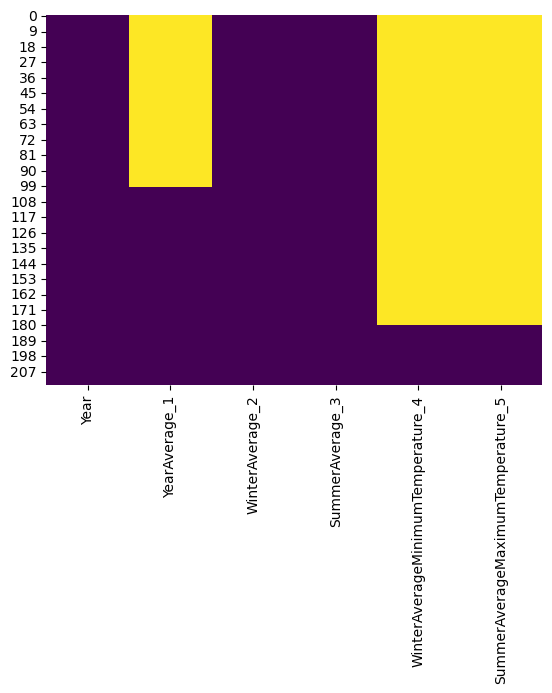

In [46]:
# Eksik verileri görselleştirmek için ısı haritası kullanıyorum.

import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### 2. Adım: Sadece Year, Winter Average ve Summer Average değişkenlerinin bırakılması

In [49]:
# 'Year Average, Winter Avg Min Temp ve Summer Avg Max Temp' sütunlarını veri setinden kaldırma
df.drop(columns=['YearAverage_1', 'WinterAverageMinimumTemperature_4', 'SummerAverageMaximumTemperature_5'], inplace=True)

# Değişiklikleri kontrol ediyorum
print(df.head())


   Year  WinterAverage_2  SummerAverage_3
0  1800             -1.0             15.1
1  1801              1.7             15.2
2  1802              1.1             15.3
3  1803             -1.2             16.0
4  1804              2.2             15.4


### 3. Adım: DATA VISUALIZATION (Part 2)

#### 1. Histogram

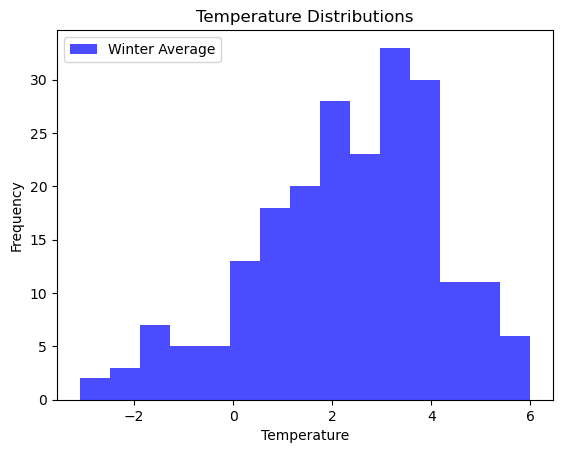

In [53]:
# Histogram - Winter Averages
plt.hist(df["WinterAverage_2"], bins=15, alpha=0.7, color='blue', label="Winter Average")

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distributions")
plt.legend()
plt.show()


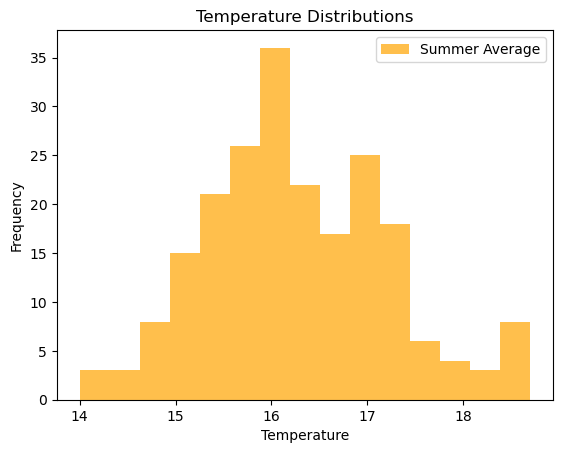

In [55]:
# Histogram - Summer Averages
plt.hist(df["SummerAverage_3"], bins=15, alpha=0.7, color='orange', label="Summer Average")

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distributions")
plt.legend()
plt.show()

#### 2. Scatter Plot

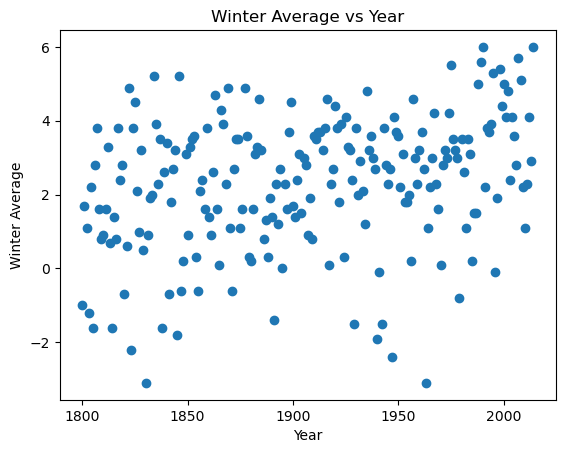

In [58]:
plt.scatter(df['Year'], df['WinterAverage_2'])
plt.title('Winter Average vs Year')
plt.xlabel('Year')
plt.ylabel('Winter Average')
plt.show()


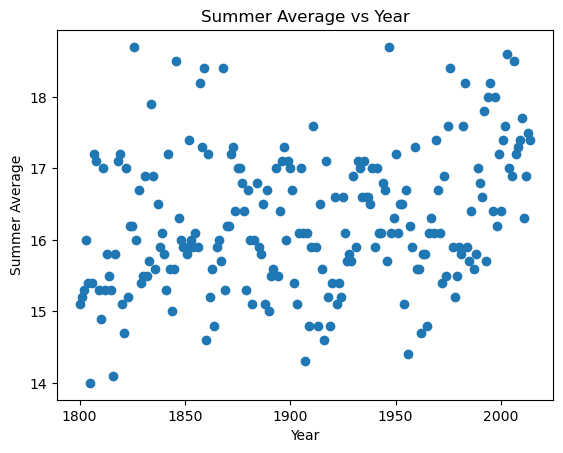

In [60]:
plt.scatter(df['Year'], df['SummerAverage_3'])
plt.title('Summer Average vs Year')
plt.xlabel('Year')
plt.ylabel('Summer Average')
plt.show()


#### 3. Line Plot

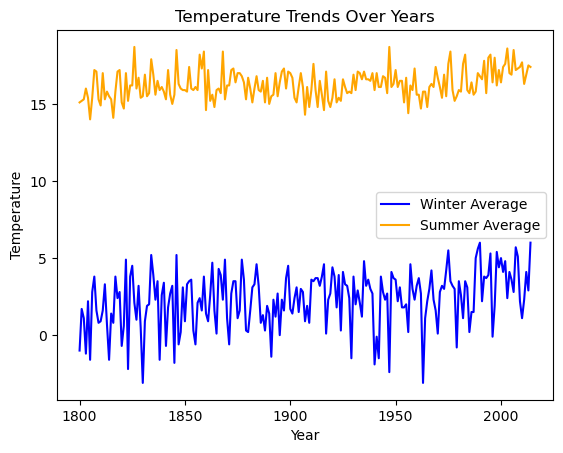

In [63]:
plt.plot(df['Year'], df['WinterAverage_2'], label='Winter Average', color='blue')
plt.plot(df['Year'], df['SummerAverage_3'], label='Summer Average', color='orange')
plt.title('Temperature Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#### 4. Heatmap

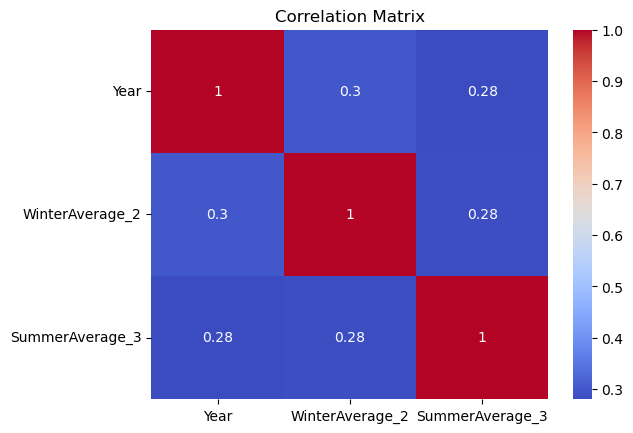

In [66]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### 5. Pairplot (Çiftli Dağılım Grafiği)

/Users/tugbanurisik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


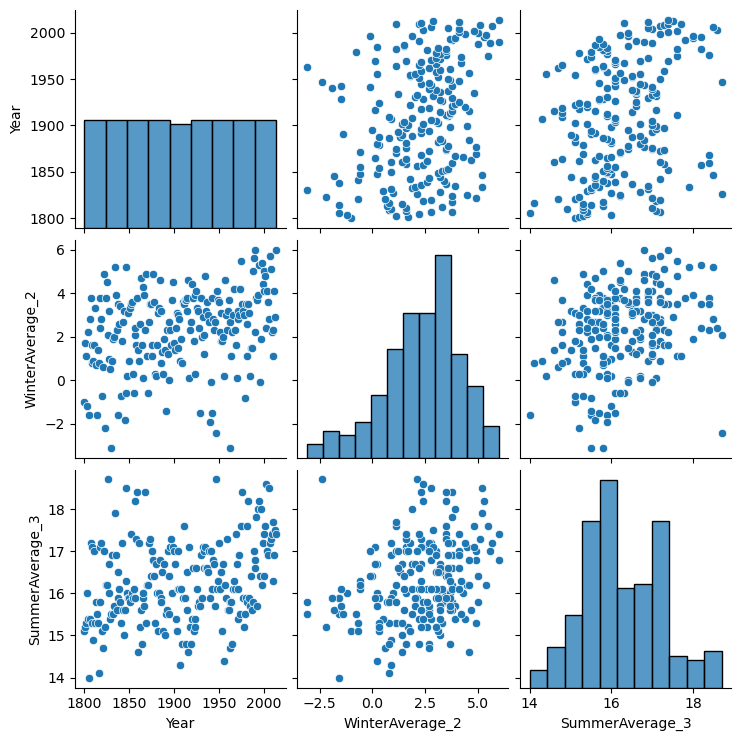

In [69]:
sns.pairplot(df)
plt.show()


### 4. Adım:  VERI ANALIZI SONUÇLARI (Part 2)

#### Correlation matrixindeki verilere göre

Winter Average ile Years arasında 0.3, 
Summer Average ile Years arasında 0.28 ve 
Winter Average ile Summer Average arasında 0.29'luk korelasyonlar bulunuyor. 

Bu korelasyonların yorumlarsak:

Korelasyon değeri 0 ile 1 arasında pozitif olduğu için, Korelasyon değerleri zayıf ama pozitif bir ilişkiyi işaret eder. 

Ancak tahmin modeli geliştirmek için yeterli gözükmüyor. 

    Bu sebeple ikinci adımda Günlere Bağli Değişkenler ile Years değişkeni arasındaki ilişkiyi gözlemleyeeğim.

## DATA Preprocessing (Part 3)
### Gün bazlı verilerin yıllara göre değişimini anlamak için yeni bir Preprocessing adımı 

In [76]:
# Temizlenmiş ve düzenlenmiş Excel dosyasını geri yüklüyorum 
df = pd.read_excel('temizlenmis_veri.xlsx')

# Veri çerçevesini görüntülüyorum
print(df.head())


   Year  YearAverage_1  WinterAverage_2  SummerAverage_3  \
0  1800            NaN             -1.0             15.1   
1  1801            NaN              1.7             15.2   
2  1802            NaN              1.1             15.3   
3  1803            NaN             -1.2             16.0   
4  1804            NaN              2.2             15.4   

   WinterAverageMinimumTemperature_4  SummerAverageMaximumTemperature_5  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   IceDays_6  FrostDays_7  SummeryDays_8  TropicalDays_9  \
0        NaN          NaN            NaN             NaN   
1        NaN          NaN            NaN             NaN   
2       

### 1. Adım: 

    Sadece Ice Days, Frost Days, ve Summery Days, Tropical Days, Snow Days, Heating Degree Days, Days with Precipitation, Days with Frog, Dry Days ve Sunless Days değişkenlerinin bırakılması

In [83]:
# '1,2,3,4,5,11,16,17 ve 18.' sütunları veri setinden kaldırma
df.drop(columns=['YearAverage_1', 'WinterAverage_2','SummerAverage_3', 'WinterAverageMinimumTemperature_4', 'SummerAverageMaximumTemperature_5', 'QuantityOfPrecipitation_11', 'Evaporation_16', 'RelativeHumidity_17', 'HoursOfSunshine_18' ], inplace=True)

# Değişiklikleri kontrol ediyorum
print(df.head())

   Year  IceDays_6  FrostDays_7  SummeryDays_8  TropicalDays_9  \
0  1800        NaN          NaN            NaN             NaN   
1  1801        NaN          NaN            NaN             NaN   
2  1802        NaN          NaN            NaN             NaN   
3  1803        NaN          NaN            NaN             NaN   
4  1804        NaN          NaN            NaN             NaN   

   HeatingDegreeDays_10  DaysWithPrecipitation_12  SnowDays_13  DryDays_14  \
0                   NaN                       NaN          NaN         NaN   
1                   NaN                       NaN          NaN         NaN   
2                   NaN                       NaN          NaN         NaN   
3                   NaN                       NaN          NaN         NaN   
4                   NaN                       NaN          NaN         NaN   

   DaysWithFog_15  SunlessDays_19  
0             NaN             NaN  
1             NaN             NaN  
2             NaN         

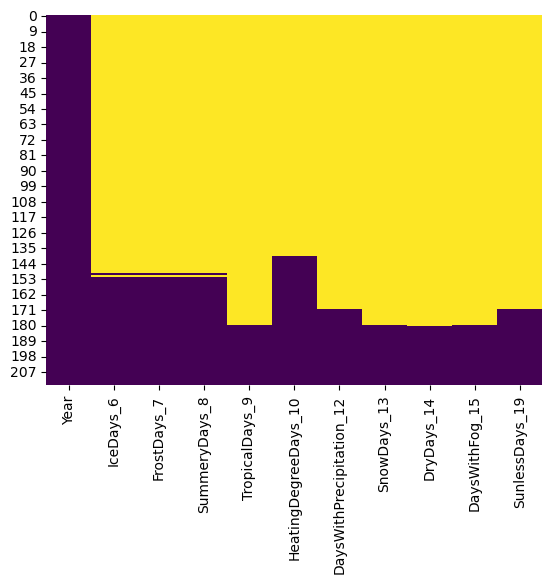

In [85]:
# Eksik verileri görselleştirmek için ısı haritası kullanıyorum.

import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Gün bazındakı verilerin ortak başlama yılı olarak Dry Days değerinin başladığı 1981 yılını baz almak istiyorum. 
    1981 yılından önce girilen verileri silebilmek için önce 1981 yılının kaçıncı satıra denk geldiğıni bulmam gerekiyor. 

In [90]:
# İlk 1981 yılına ait satırı bulma
first_1981_row = df[df['Year'] >= 1981].index[0]
print("1981 yılına ait veriler ilk olarak", first_1981_row, ". satırda başlıyor.")


1981 yılına ait veriler ilk olarak 181 . satırda başlıyor.


#### Yukarıdaki output'u doğrulamam gerek

In [101]:
# Satır numaralarını bir liste olarak belirleyin
satir_numaralari = [178, 179, 180, 181, 182, 183, 184] 

# Belirtilen satırları görüntülemek için iloc kullanıyorum
secilen_satirlar = df.iloc[satir_numaralari]

# Seçilen satırları yazdırıyorum 
print(secilen_satirlar)


     Year  IceDays_6  FrostDays_7  SummeryDays_8  TropicalDays_9  \
178  1978       14.0         64.0           13.0             NaN   
179  1979       25.0         83.0           13.0             NaN   
180  1980       10.0         72.0           12.0             0.0   
181  1981       12.0         73.0           14.0             0.0   
182  1982       18.0         74.0           32.0             6.0   
183  1983        3.0         63.0           40.0             7.0   
184  1984        3.0         56.0           16.0             2.0   

     HeatingDegreeDays_10  DaysWithPrecipitation_12  SnowDays_13  DryDays_14  \
178                3304.0                     133.0          NaN         NaN   
179                3476.0                     147.0          NaN         NaN   
180                3301.0                     137.0         37.0         NaN   
181                3244.0                     146.0         46.0        71.0   
182                3005.0                     117.0    

#### Yukarıda görüldüğü üzere Dry Days için ilk veri 181. satırda girilmiş. Bu satırdan önceki verileri sileceğim.

In [110]:
# 1981 ve sonrasındaki verileri tutup, 1981'den önceki verileri siliyorum
df = df[df['Year'] >= 1981]

# İndeksleri sıfırlayın
df.reset_index(drop=True, inplace=True)


# Yeni DataFrame'i görüntülüyorum
print(df)


    Year  IceDays_6  FrostDays_7  SummeryDays_8  TropicalDays_9  \
0   1981       12.0         73.0           14.0             0.0   
1   1982       18.0         74.0           32.0             6.0   
2   1983        3.0         63.0           40.0             7.0   
3   1984        3.0         56.0           16.0             2.0   
4   1985       28.0         89.0           15.0             1.0   
5   1986       19.0         73.0           21.0             3.0   
6   1987       17.0         80.0           11.0             0.0   
7   1988        0.0         34.0           15.0             0.0   
8   1989        1.0         41.0           34.0             3.0   
9   1990        0.0         33.0           32.0             3.0   
10  1991        8.0         68.0           26.0             1.0   
11  1992        6.0         34.0           33.0             3.0   
12  1993        8.0         60.0           13.0             0.0   
13  1994        7.0         48.0           24.0             9.

In [112]:
#Yeni veri setimin boyutunu (satır, sütun) olarak kontrol ediyorum.

print(df.shape)

(34, 11)


In [114]:
# Veri çerçevesindeki eksik veri olup olmadığını kontrol ediyorum
missing_data = df.isnull().sum()

# Sonuçları görüntülüyorum
print(missing_data)


Year                        0
IceDays_6                   0
FrostDays_7                 0
SummeryDays_8               0
TropicalDays_9              0
HeatingDegreeDays_10        0
DaysWithPrecipitation_12    0
SnowDays_13                 0
DryDays_14                  0
DaysWithFog_15              0
SunlessDays_19              0
dtype: int64


### 2. Adım: DATA VISUALIZATION (Part 3)

#### 1. Histogram

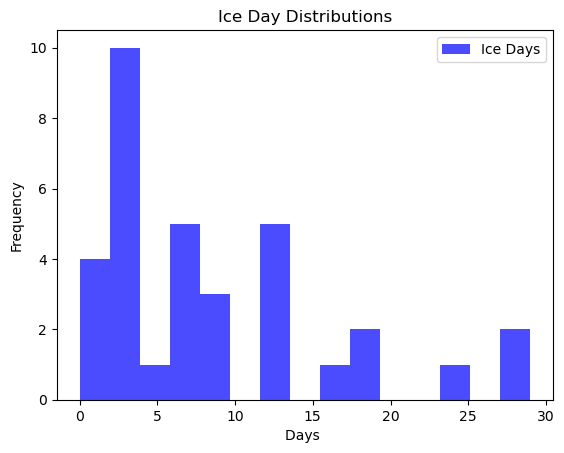

In [120]:
# Histogram - Ice Days
plt.hist(df["IceDays_6"], bins=15, alpha=0.7, color='blue', label="Ice Days")

plt.xlabel("Days ")
plt.ylabel("Frequency")
plt.title("Ice Day Distributions")
plt.legend()
plt.show()

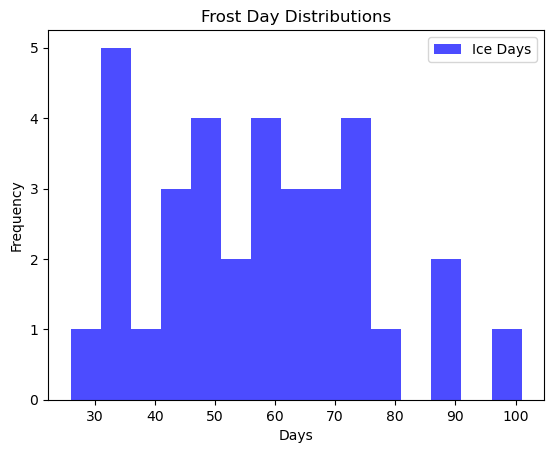

In [122]:
# Histogram - Ice Days
plt.hist(df["FrostDays_7"], bins=15, alpha=0.7, color='blue', label="Ice Days")

plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Frost Day Distributions")
plt.legend()
plt.show()

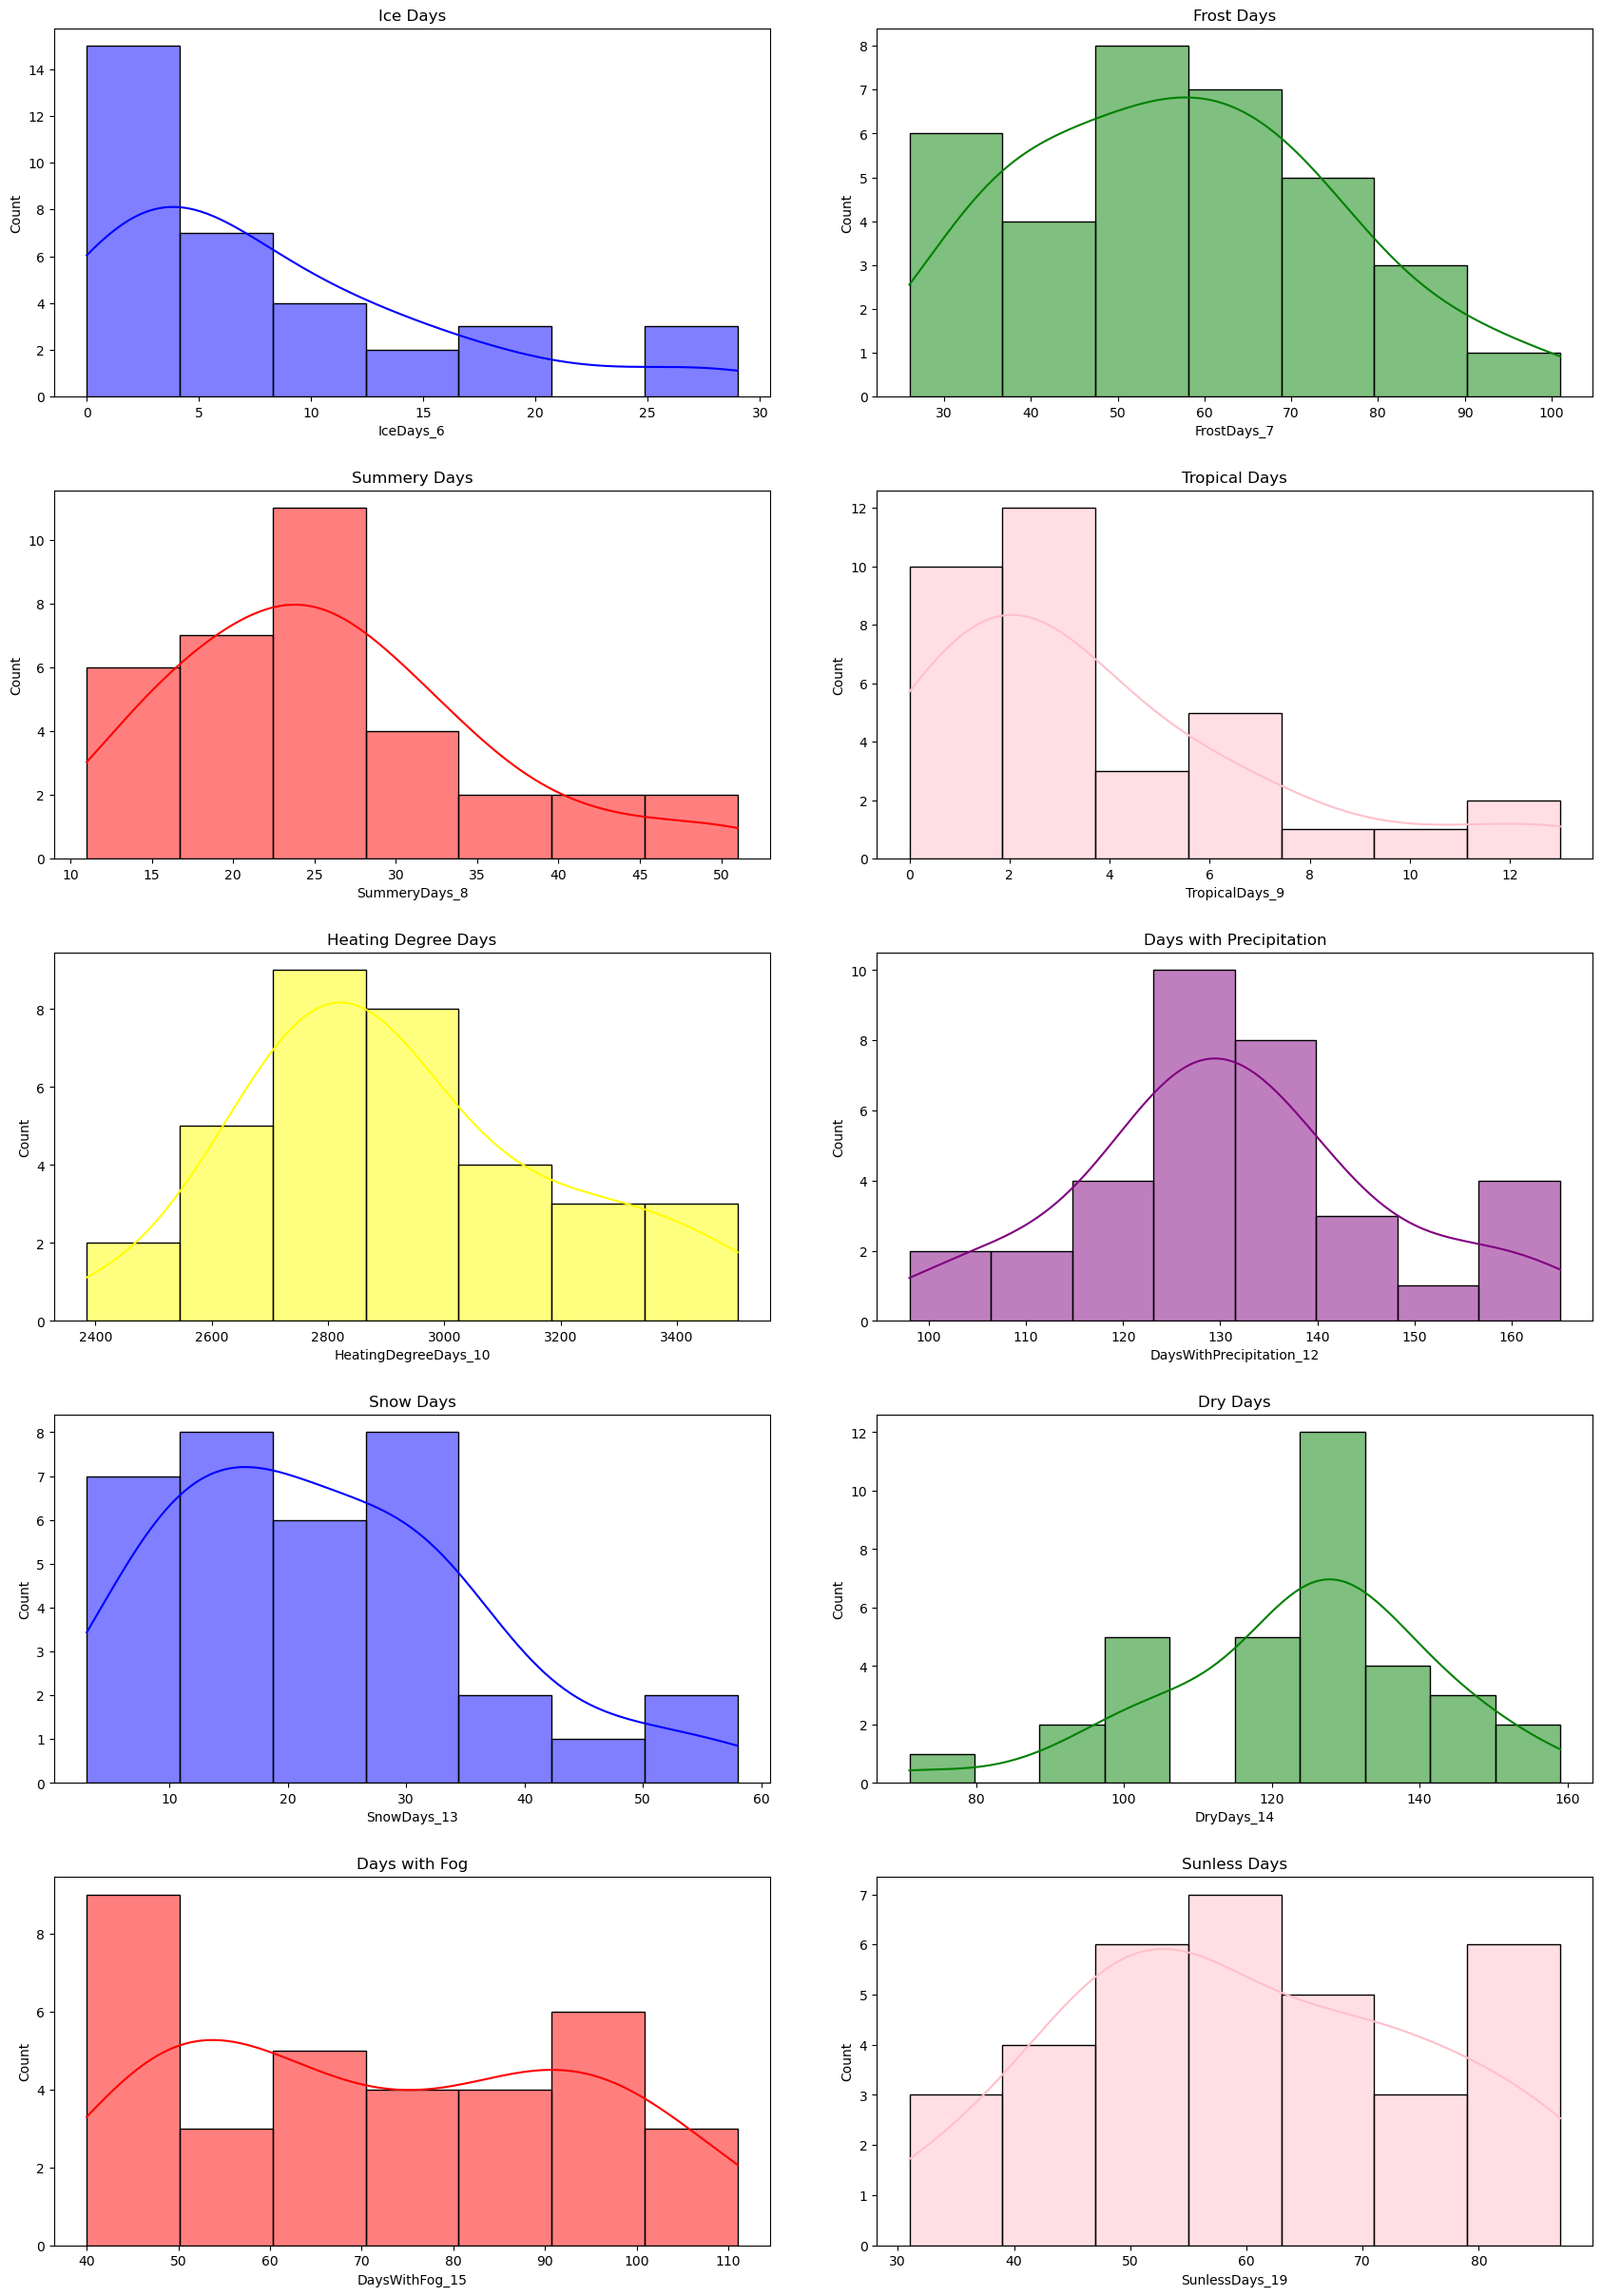

In [144]:

# Subplot'larla 3 histogram oluşturma

fig, axes = plt.subplots(5, 2, figsize=(18, 25))  # 5 satır, 2 sütun
fig.tight_layout(pad=5.0)  # Grafikler arasında boşluk bırakmak için

# Ice Days için histogram
sns.histplot(df['IceDays_6'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Ice Days')

# Frost Days için histogram
sns.histplot(df['FrostDays_7'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Frost Days')

# Summery Days için histogram
sns.histplot(df['SummeryDays_8'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Summery Days')

# Tropical Days için histogram
sns.histplot(df['TropicalDays_9'], kde=True, ax=axes[1, 1], color='pink')
axes[1, 1].set_title('Tropical Days')

# Heating Degree Days için histogram
sns.histplot(df['HeatingDegreeDays_10'], kde=True, ax=axes[2, 0], color='yellow')
axes[2, 0].set_title('Heating Degree Days')

# Days with Precipitation için histogram
sns.histplot(df['DaysWithPrecipitation_12'], kde=True, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Days with Precipitation')

# Snow Days için histogram
sns.histplot(df['SnowDays_13'], kde=True, ax=axes[3, 0], color='blue')
axes[3, 0].set_title('Snow Days')

# Dry Days için histogram
sns.histplot(df['DryDays_14'], kde=True, ax=axes[3, 1], color='green')
axes[3, 1].set_title('Dry Days')

# Days with Fog için histogram
sns.histplot(df['DaysWithFog_15'], kde=True, ax=axes[4, 0], color='red')
axes[4, 0].set_title('Days with Fog')

# Sunless Days için histogram
sns.histplot(df['SunlessDays_19'], kde=True, ax=axes[4, 1], color='pink')
axes[4, 1].set_title('Sunless Days')

plt.show()


### 2. Scatter Plot

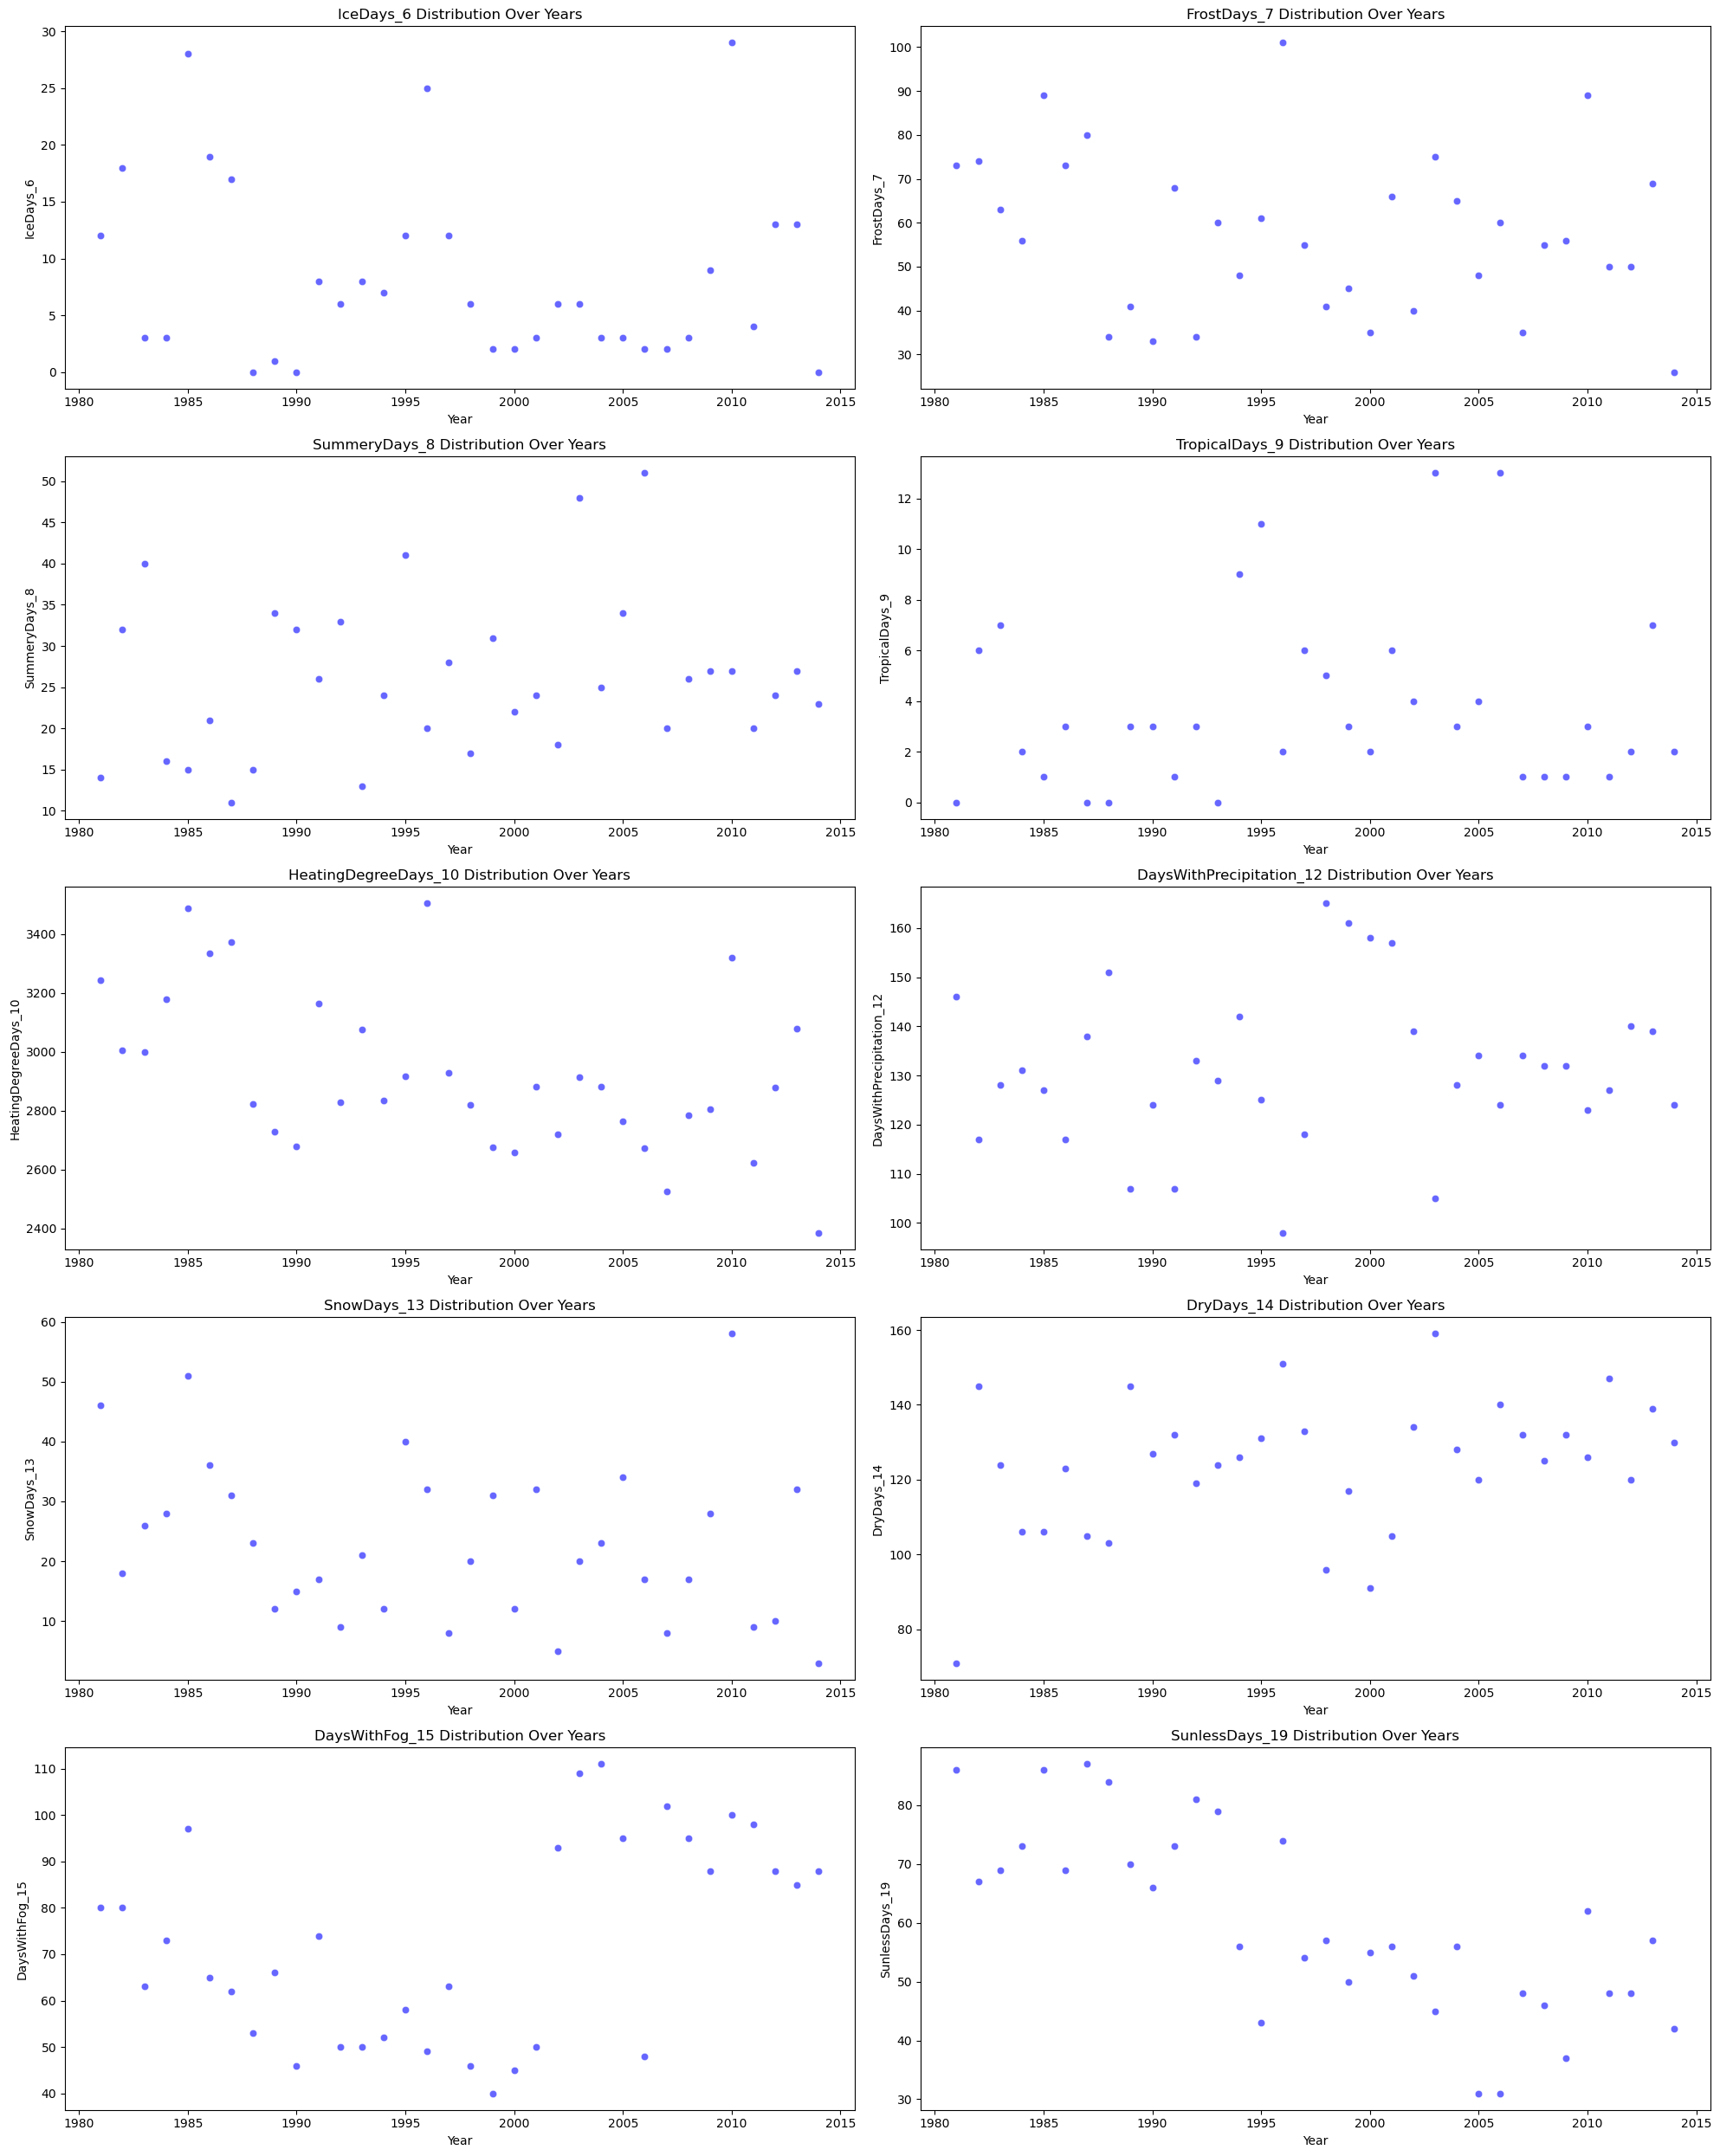

In [151]:
variables = [
    'IceDays_6', 'FrostDays_7', 'SummeryDays_8', 'TropicalDays_9', 
    'HeatingDegreeDays_10', 'DaysWithPrecipitation_12','SnowDays_13',  
    'DryDays_14','DaysWithFog_15', 'SunlessDays_19'
]

# Figure ve subplots oluşturma
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5 satır, 2 sütun

# Değişkenleri sırasıyla çizme
for ax, var in zip(axes.flatten(), variables):
    if var in df.columns:  # Değişken veri çerçevesinde mevcutsa çiz
        sns.scatterplot(data=df, x='Year', y=var, ax=ax, color='blue', alpha=0.6)
        ax.set_title(f"{var} Distribution Over Years", fontsize=12)
        ax.set_xlabel("Year")
        ax.set_ylabel(var)
    else:  # Değişken bulunamazsa uyarı ver
        ax.text(0.5, 0.5, f"{var} Not Found", fontsize=15, ha='center', va='center')
        ax.set_axis_off()

# Alt çizimlerin arasındaki boşlukları düzenle
plt.tight_layout()
plt.show()


### 3. Pairplot

/Users/tugbanurisik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


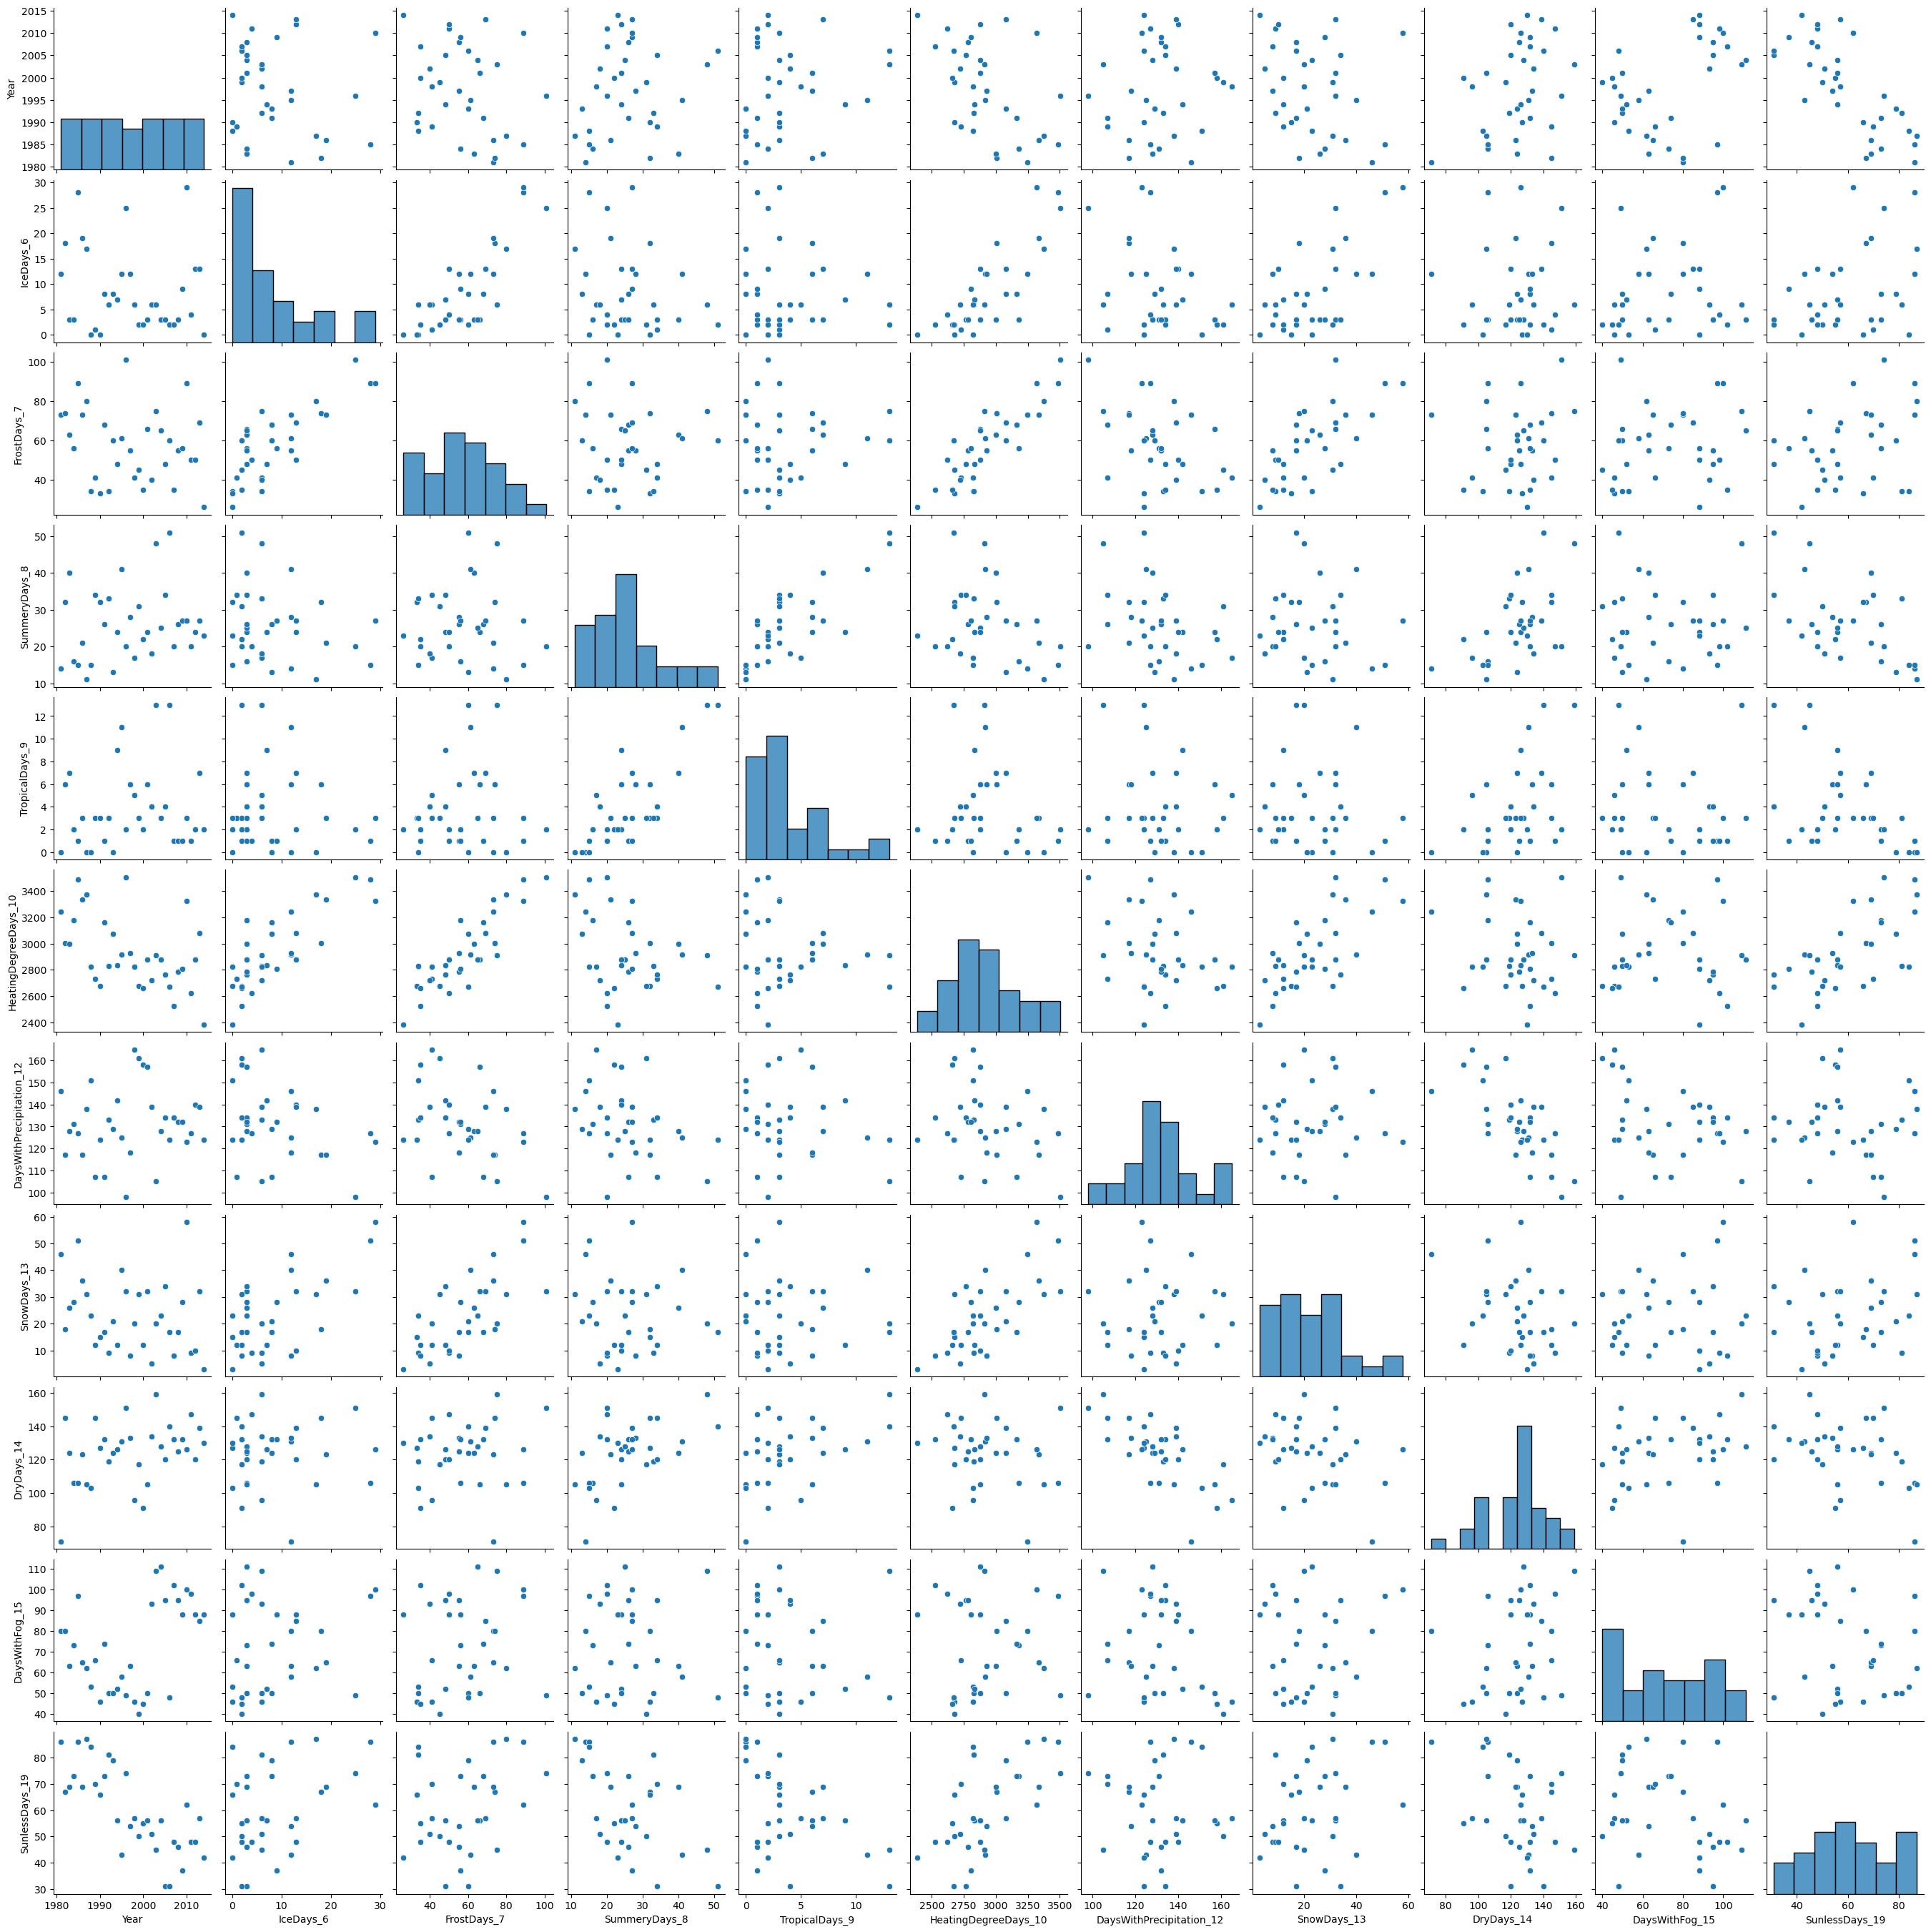

In [154]:
sns.pairplot(df)
plt.show()

### 4. Heatmap

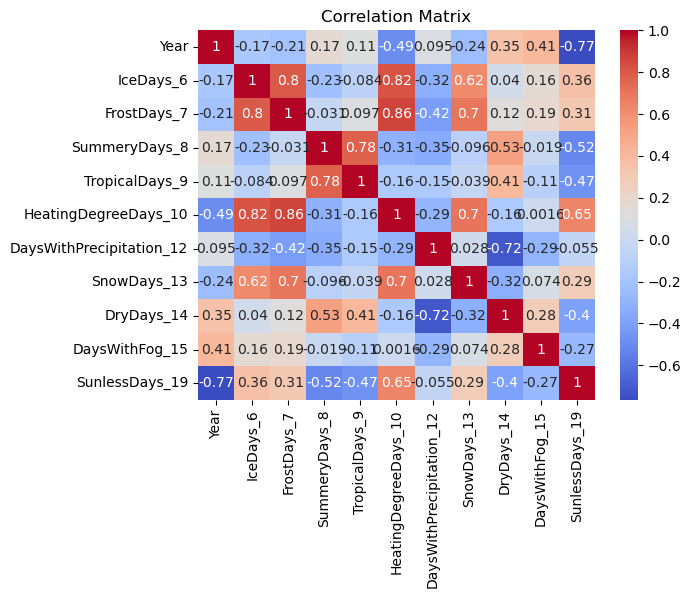

In [157]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Adım: Yorumlama

#### Correlation matrixindeki verilere göre

Years ile hiçbir veri arasında korelasyon yok.

Ice Days ile  

Frost Days ile 

Summery Days ile

Tropical Days ile

Heating Degree Days ile

Days with Precipitation ile

Snow Days ile

Days with Fog ile

Dry Days ile 

Sunless Days ile

Bu korelasyonları yorumlarsak:

Korelasyon değeri 0 ile 1 arasında pozitif olduğu için, Korelasyon değerleri zayıf ama pozitif bir ilişkiyi işaret eder. 

Ancak tahmin modeli geliştirmek için yeterli gözükmüyor. 

    Bu sebeple üçüncü adımda 